In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [45]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [46]:
df.shape

(42000, 785)

In [47]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17219,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32318,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38030,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28232,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


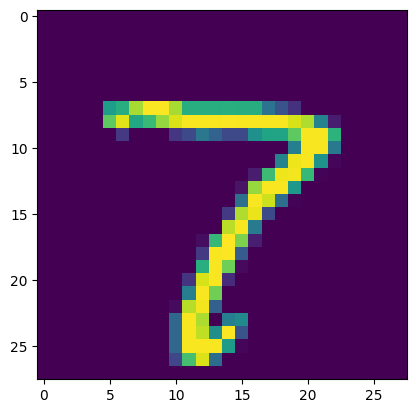

In [48]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[28627, 1:].values.reshape(28,28))

In [49]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
X_train.shape

(33600, 784)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=None)

In [57]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [58]:
X_train_trf.shape

(33600, 784)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test_trf)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9391666666666667

In [ ]:
for i in range(1, 784):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred))

In [65]:
# transforming a 2D coordinate system
pca =PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [66]:
X_train_trf

array([[-2.71860687, -0.48959497],
       [-0.67697809, -6.75390058],
       [-3.03322888,  6.50981418],
       ...,
       [ 2.14881715,  0.78047788],
       [ 1.05957306,  0.94793367],
       [17.70258269,  1.9621358 ]])

In [67]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [68]:
# transforming a 3D coordinate system
pca =PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [69]:
X_train_trf

array([[-2.71864958, -0.49038605,  1.13488288],
       [-0.67696937, -6.75295623, -2.33506135],
       [-3.03321202,  6.5099431 ,  7.49172162],
       ...,
       [ 2.14883295,  0.78165204, -0.74666939],
       [ 1.05954259,  0.94693383,  3.94915029],
       [17.7025781 ,  1.96171775, -4.94355265]])

In [70]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 z=X_train_trf[:, 2],
                 color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show() 

In [71]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023387, 26.7445959 ])

In [72]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [73]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [74]:
pca =PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [75]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

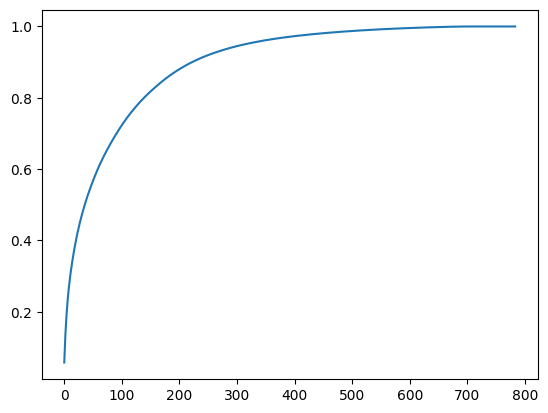

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [78]:
# 90 percentile (0.9)
pca =PCA(n_components=200)